# Titanic train

In [1]:
#Importing all the necessary laibraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#calling the data set
df=pd.read_csv("C:/Users/samir/Downloads/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#describing the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# As their is NaN present in data ...so droping the NaN
df=df.dropna()

In [6]:
# Checking the null values after droping the null value
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

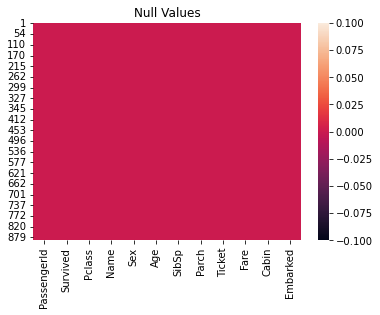

In [7]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [8]:
#Checking the outliers 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


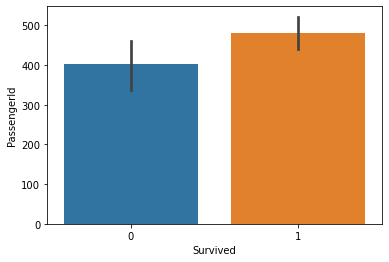

In [10]:
sns.barplot(x='Survived',y='PassengerId',data=df)
plt.show()

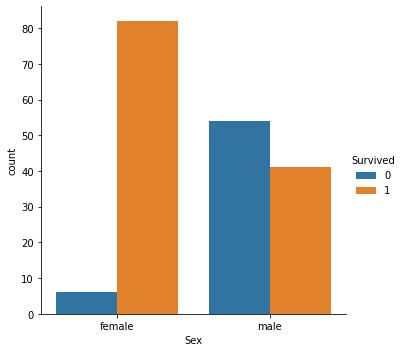

In [11]:
sns.catplot(x='Sex',hue='Survived',kind="count",data=df)
plt.show()

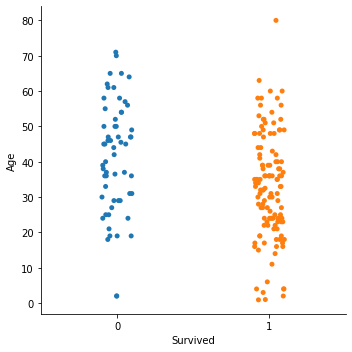

In [12]:
sns.catplot(x='Survived',y='Age',data=df)
plt.show()

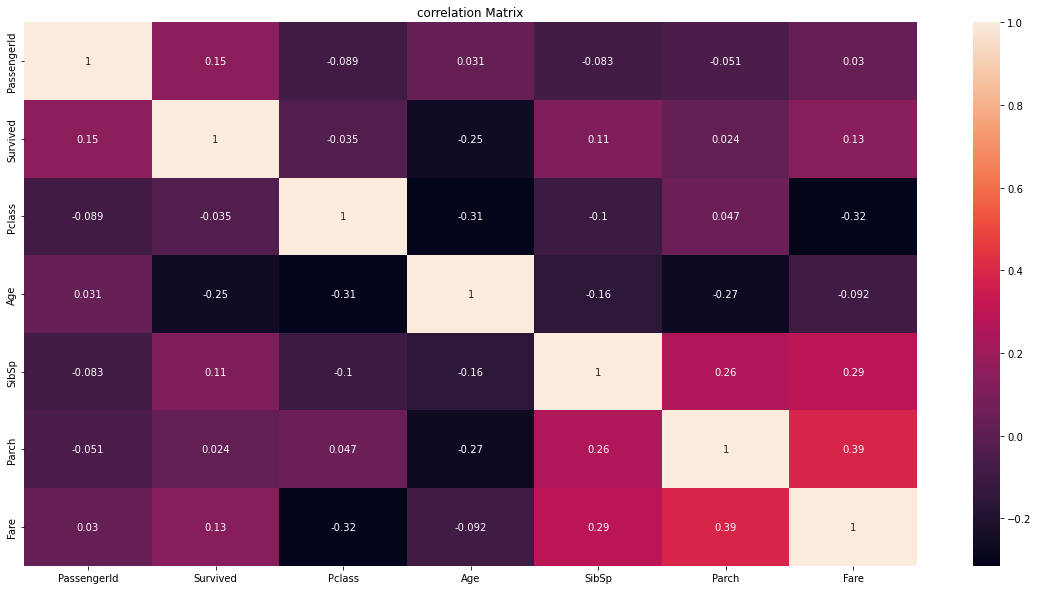

In [13]:
corr_mat = df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

<AxesSubplot:xlabel='PassengerId'>

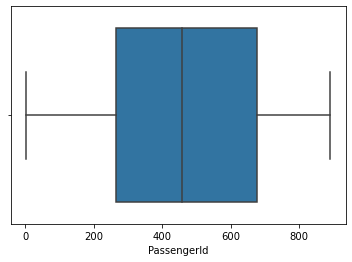

In [14]:
sns.boxplot('PassengerId',data=df)

<AxesSubplot:xlabel='Survived'>

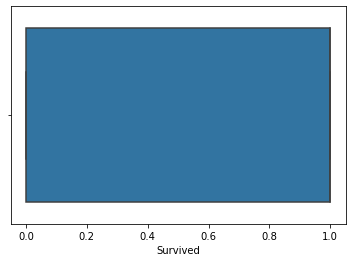

In [15]:
sns.boxplot('Survived',data=df)

<AxesSubplot:xlabel='Pclass'>

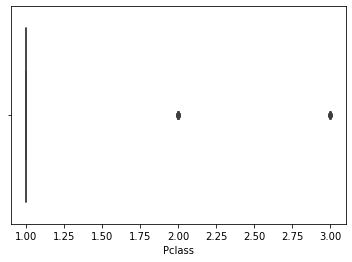

In [16]:
sns.boxplot('Pclass',data=df)

<AxesSubplot:xlabel='Age'>

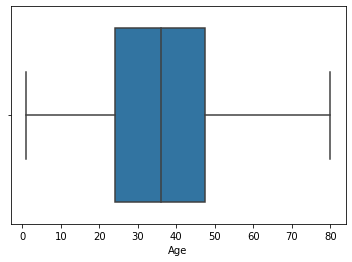

In [17]:
sns.boxplot('Age',data=df)

<AxesSubplot:xlabel='SibSp'>

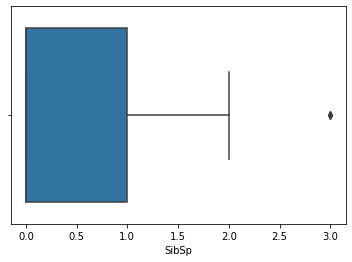

In [18]:
sns.boxplot('SibSp',data=df)

<AxesSubplot:xlabel='Parch'>

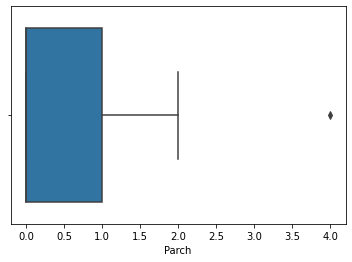

In [19]:
sns.boxplot('Parch',data=df)

<AxesSubplot:xlabel='Fare'>

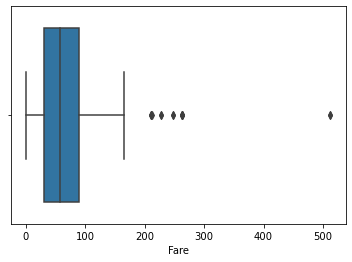

In [20]:
sns.boxplot('Fare',data=df)

In [21]:
df["Survived"].unique()

array([1, 0], dtype=int64)

In [22]:
new_survived=pd.Categorical(df["Survived"])
new_survived=new_survived.rename_categories(["Died","Survived"])
new_survived.describe()

,counts,freqs
categories,,
Died,60,0.327869
Survived,123,0.672131


In [23]:
df.skew()

PassengerId   -0.053773
Survived      -0.739427
Pclass         2.681459
Age            0.009676
SibSp          1.443019
Parch          1.519305
Fare           2.715883
dtype: float64

In [24]:
df= df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542
872,873,0,1,33.0,0,0,5.0000
879,880,1,1,56.0,0,1,83.1583
887,888,1,1,19.0,0,0,30.0000


In [25]:
#REMOVING OUTLIERS
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(183, 7)

In [26]:
threshold=3
print(np.where(z>3))

(array([  3,   7,  12,  13,  34,  42,  71,  80,  82,  86, 137, 142, 148,
       153, 158, 172], dtype=int64), array([2, 4, 2, 4, 2, 2, 4, 2, 2, 5, 6, 2, 2, 6, 2, 2], dtype=int64))


In [27]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
#REMOVING SKEEWNESS
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [29]:
x

array([[-2.16047297,  0.6984303 , -0.39777795,  0.16547565,  1.16370171,
        -0.70488788],
       [-2.1379038 ,  0.6984303 , -0.39777795, -0.02466125,  1.16370171,
        -0.70488788],
       [-2.10757177, -1.43178211, -0.39777795,  1.16279008, -0.81065402,
        -0.70488788],
       ...,
       [ 1.58728244,  0.6984303 , -0.39777795,  1.28577005, -0.81065402,
         1.29993978],
       [ 1.61394545,  0.6984303 , -0.39777795, -1.06246506, -0.81065402,
        -0.70488788],
       [ 1.62060274,  0.6984303 , -0.39777795, -0.60276926, -0.81065402,
        -0.70488788]])

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.16047297,  0.6984303 , -0.39777795,  0.16547565,  1.16370171,
        -0.70488788],
       [-2.1379038 ,  0.6984303 , -0.39777795, -0.02466125,  1.16370171,
        -0.70488788],
       [-2.10757177, -1.43178211, -0.39777795,  1.16279008, -0.81065402,
        -0.70488788],
       ...,
       [ 1.58728244,  0.6984303 , -0.39777795,  1.28577005, -0.81065402,
         1.29993978],
       [ 1.61394545,  0.6984303 , -0.39777795, -1.06246506, -0.81065402,
        -0.70488788],
       [ 1.62060274,  0.6984303 , -0.39777795, -0.60276926, -0.81065402,
        -0.70488788]])

In [31]:
x_train = df.drop(['PassengerId','Pclass','Age','SibSp','Parch','Fare'],axis=1)
x_test = df[['Survived']]

In [32]:
x_train,x_test, y_train,y_test = train_test_split(x_train, x_test, test_size=0.2, random_state=5)

In [33]:
x_train

,Survived
717,1
230,1
887,1
305,1
341,1
...,...
52,1
356,1
701,1
581,1


In [34]:
len(x_test)

37

In [35]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [36]:
predict = regression.predict(x_test)
predict

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [37]:
regression.score(x_test, y_test)

1.0